In [1]:
#pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
#Insert data 

#copied from the website
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
breast_cancer = fetch_ucirepo(id=14) 
  
# data (as pandas dataframes) 
X = breast_cancer.data.features 
y = breast_cancer.data.targets 
  
# metadata 
print(breast_cancer.metadata) 
  
# variable information 
#print(breast_cancer.variables) 

#convert dataset into a dataframe 
breast_cancer= pd.DataFrame(data=X, columns=breast_cancer.variables['name']) 
breast_cancer['Class']= y
print(breast_cancer)

#I copied this from a past homework assignment so that I could see what the data looked like
#prior to graphing

{'uci_id': 14, 'name': 'Breast Cancer', 'repository_url': 'https://archive.ics.uci.edu/dataset/14/breast+cancer', 'data_url': 'https://archive.ics.uci.edu/static/public/14/data.csv', 'abstract': 'Breast Cancer Data (Restricted Access)', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 286, 'num_features': 9, 'feature_types': ['Categorical'], 'demographics': ['Age'], 'target_col': ['Class'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1988, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C51P4M', 'creators': ['Matjaz Zwitter', 'Milan Soklic'], 'intro_paper': None, 'additional_info': {'summary': 'This is one of three domains provided by the Oncology Institute that has repeatedly appeared in the machine learning literature. (See also lymphography and primary-tumor.)\r\n\r\nThis data set includes 201 instances of one class and 85 instances of another 

C:\Users\arnol\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\arnol\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\arnol\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\arnol\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\clus

Optimal k: 10, Minimum Sum of Squared Distances: 8380851.808186907


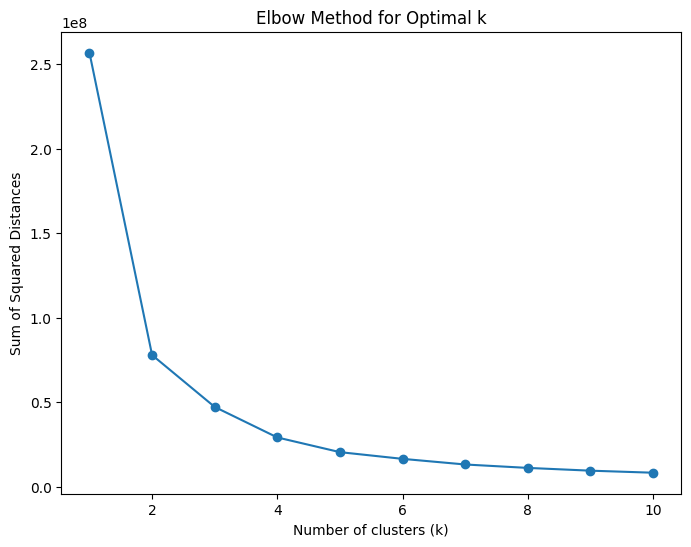

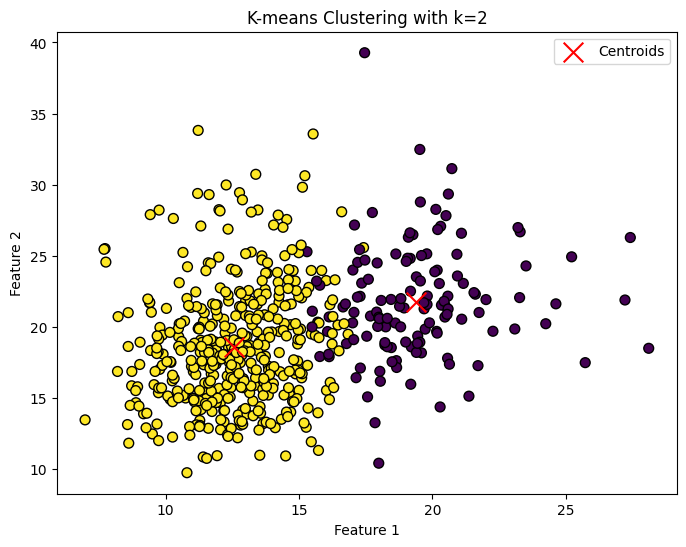

In [16]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import load_breast_cancer
#this loads the breast cancer dataset so that it is useable 
# Load the Breast Cancer dataset
data = load_breast_cancer()
X = data.data  # all of the inputs of the dataset 
y = data.target  # all of the outputs of the dataset 

# Calculate squared distances for different values of k
#part 1 of the assignment 
sse = [] #empty list for the sum of squared distances values of k
K_range = range(1, 11)  # this is trying different values from 1-10 for k

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)

# Find the minimum sum of squared distances
min_sse = min(sse)
optimal_k = sse.index(min_sse) + 1
print (f"Optimal k: {optimal_k}, Minimum Sum of Squared Distances: {min_sse}")

# Plotting the Elbow Method graph to find the optimal k
plt.figure(figsize=(8, 6))
plt.plot(K_range, sse, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Sum of Squared Distances')
plt.title('Elbow Method for Optimal k')
plt.show()

# Based on the Elbow Method graph we chose what we think is the best k for the number of clusters 


#k-means clustering
optimal_k = 2  # optimal k determined to be _2_ but this would change based on dataset 
#this is the point of inflection in the graph 

kmeans_optimal = KMeans(n_clusters=optimal_k, random_state=42,n_init=10)
kmeans_optimal.fit(X)
predicted_labels = kmeans_optimal.predict(X)

# Plotting the clusters and centroids
plt.figure(figsize=(8, 6))

# Plot data points 
plt.scatter(X[:, 0], X[:, 1], c=predicted_labels, cmap='viridis', edgecolor='k', s=50)
# Plot centroids
plt.scatter(
    kmeans_optimal.cluster_centers_[:, 0],
    kmeans_optimal.cluster_centers_[:, 1],
    c='red',
    marker='x',
    s=200,
    label='Centroids',
)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title(f'K-means Clustering with k={optimal_k}')
plt.legend()
plt.show()


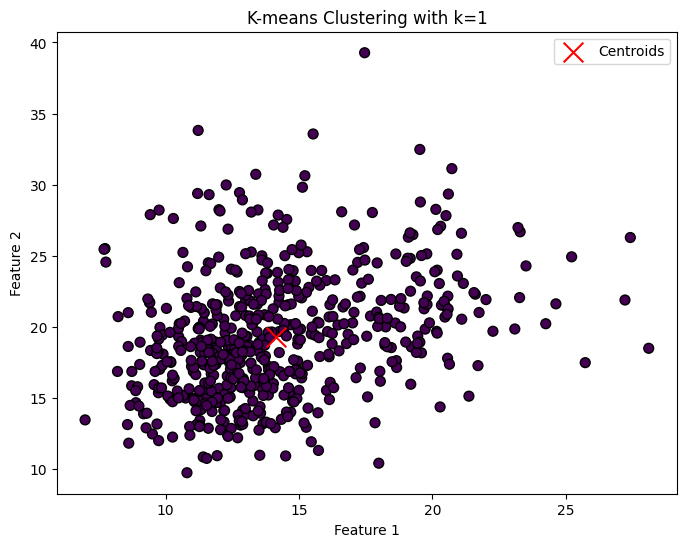

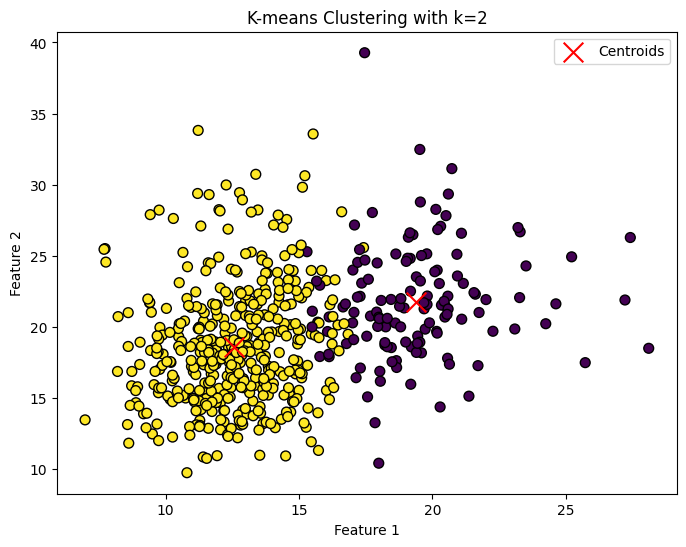

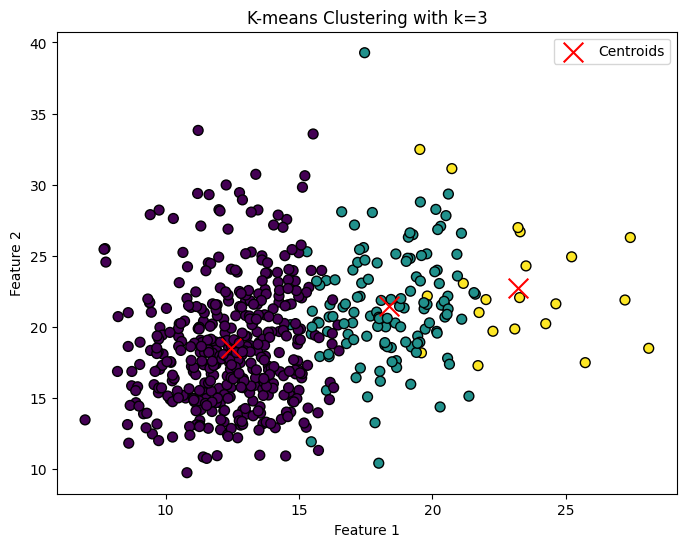

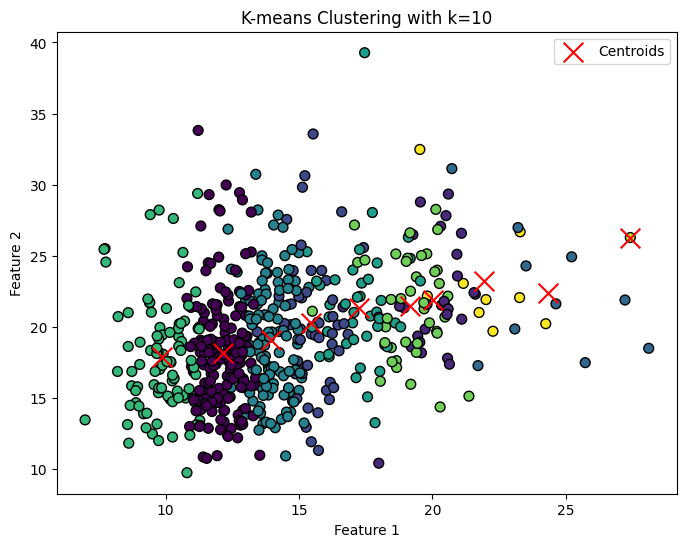

In [17]:
# i copied my code down to show what it would look like with more and less clusters 
#k-means clustering
#1 clusters 
optimal_k = 1 # optimal k determined to be _2_ but this would change based on dataset 
#this is the point of inflection in the graph 

kmeans_optimal = KMeans(n_clusters=optimal_k, random_state=42,n_init=10)
kmeans_optimal.fit(X)
predicted_labels = kmeans_optimal.predict(X)

# Plotting the clusters and centroids
plt.figure(figsize=(8, 6))

# Plot data points 
plt.scatter(X[:, 0], X[:, 1], c=predicted_labels, cmap='viridis', edgecolor='k', s=50)
# Plot centroids
plt.scatter(
    kmeans_optimal.cluster_centers_[:, 0],
    kmeans_optimal.cluster_centers_[:, 1],
    c='red',
    marker='x',
    s=200,
    label='Centroids',
)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title(f'K-means Clustering with k={optimal_k}')
plt.legend()
plt.show()

#2 cluster 
#k-means clustering
optimal_k = 2  # optimal k determined to be _2_ but this would change based on dataset 
#this is the point of inflection in the graph 

kmeans_optimal = KMeans(n_clusters=optimal_k, random_state=42,n_init=10)
kmeans_optimal.fit(X)
predicted_labels = kmeans_optimal.predict(X)

# Plotting the clusters and centroids
plt.figure(figsize=(8, 6))

# Plot data points 
plt.scatter(X[:, 0], X[:, 1], c=predicted_labels, cmap='viridis', edgecolor='k', s=50)
# Plot centroids
plt.scatter(
    kmeans_optimal.cluster_centers_[:, 0],
    kmeans_optimal.cluster_centers_[:, 1],
    c='red',
    marker='x',
    s=200,
    label='Centroids',
)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title(f'K-means Clustering with k={optimal_k}')
plt.legend()
plt.show()

#3 cluster 
#k-means clustering
optimal_k = 3  # optimal k determined to be _2_ but this would change based on dataset 
#this is the point of inflection in the graph 

kmeans_optimal = KMeans(n_clusters=optimal_k, random_state=42,n_init=10)
kmeans_optimal.fit(X)
predicted_labels = kmeans_optimal.predict(X)

# Plotting the clusters and centroids
plt.figure(figsize=(8, 6))

# Plot data points 
plt.scatter(X[:, 0], X[:, 1], c=predicted_labels, cmap='viridis', edgecolor='k', s=50)
# Plot centroids
plt.scatter(
    kmeans_optimal.cluster_centers_[:, 0],
    kmeans_optimal.cluster_centers_[:, 1],
    c='red',
    marker='x',
    s=200,
    label='Centroids',
)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title(f'K-means Clustering with k={optimal_k}')
plt.legend()
plt.show()

#10 clusters- because my sum of squared distances said optimal value of k was 10 
#k-means clustering
optimal_k = 10  # optimal k determined to be _2_ but this would change based on dataset 
#this is the point of inflection in the graph 

kmeans_optimal = KMeans(n_clusters=optimal_k, random_state=42,n_init=10)
kmeans_optimal.fit(X)
predicted_labels = kmeans_optimal.predict(X)

# Plotting the clusters and centroids
plt.figure(figsize=(8, 6))

# Plot data points 
plt.scatter(X[:, 0], X[:, 1], c=predicted_labels, cmap='viridis', edgecolor='k', s=50)
# Plot centroids
plt.scatter(
    kmeans_optimal.cluster_centers_[:, 0],
    kmeans_optimal.cluster_centers_[:, 1],
    c='red',
    marker='x',
    s=200,
    label='Centroids',
)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title(f'K-means Clustering with k={optimal_k}')
plt.legend()
plt.show()
